# About Facebook Prophet


Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.


**2. Advantages of Prophet **


Prophet has several advantages associated with it. These are given below:-

1. Accurate and fast - Prophet is accurate and fast. It is used in many applications across Facebook for producing reliable forecasts for planning and goal setting.
2. Fully automatic - Prophet is fully automatic. We will get a reasonable forecast on messy data with no manual effort.
3. Tunable forecasts - Prophet produces adjustable forecasts. It includes many possibilities for users to tweak and adjust forecasts. We can use human-interpretable parameters to improve the forecast by adding our domain knowledge.
4. Available in R or Python - We can implement the Prophet procedure in R or Python.
5. Handles seasonal variations well - Prophet accommodates seasonality with multiple periods.
6. Robust to outliers - It is robust to outliers. It handles outliers by removing them.
7. Robust to missing data - Prophet is resilient to missing data.
3. Installation of Prophet
Table of Contents

We can install Prophet using either command prompt or Anaconda prompt using pip as follows-


In [1]:
!pip install prophet

# Getting stock data from Yahoo into FB Prophet



Let's plot historical stock prices for Workday. Ticker symbol is 'WDAY'

To view
[Ticker Symbls list](https://stockanalysis.com/stocks/)

Name: plotly
Version: 5.18.0
Summary: An open-source, interactive data visualization library for Python
Home-page: https://plotly.com/python/
Author: Chris P
Author-email: chris@plot.ly
License: MIT
Location: /home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages
Requires: tenacity, packaging
Required-by: 
[*********************100%%**********************]  1 of 1 completed


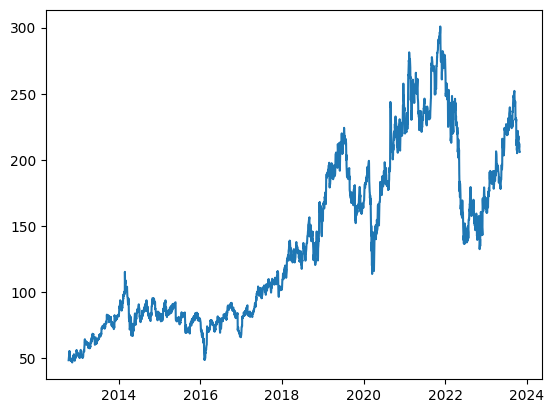

In [2]:

# Python
import pandas as pd
from prophet import Prophet

#from pandas_datareader import data as web
!pip install pandas_datareader
import pandas_datareader as pdr
import datetime

import pandas as pd
import matplotlib.pyplot as plt

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

from datetime import timedelta

import matplotlib.pyplot as plt

!pip show plotly
!pip install plotly 

#stock = 'spy'
#yesterday = pd.to_datetime("today")-1
#print(yesterday)
#endDate = pd.to_datetime("today")
#start_date = (datetime.datetime.now() - datetime.timedelta(days=2000)).strftime("%m-%d-%Y")
#start_date = (endDate - datetime.timedelta(days=2000)).strftime("%m-%d-%Y")
#print(start_date)
#df = web.DataReader(stock, data_source='yahoo', start=start_date,end=endDate)
#df = web.DataReader(stock, data_source='yahoo', start=start_date)
#date is the index so you need to make it a column
#df["Date"] = df.index

stock='WDAY'




start = '1900-01-01'

today = pd.to_datetime("today")
yesterday = pd.to_datetime("today") - timedelta(days = 1)
end = yesterday

df = yf.download(stock,
start=start,
end=yesterday,
auto_adjust=True,
actions='inline',
progress=True)

df = df.loc[:, ['Close']]
#df_GSPC = df_GSPC.pct_change().dropna()

plt.plot(df['Close'])
# plt.savefig('/content/gdrive/My Drive/Colab Notebooks/SPY_time_series_forecasting/images/SPY.png')


In [3]:
# Most recent stock prices
df.tail()


,Close
Date,
2023-10-23,209.580002
2023-10-24,212.369995
2023-10-25,207.210007
2023-10-26,205.979996
2023-10-27,206.009995


In [4]:
# Most historic Stock Prices
df.head()

,Close
Date,
2012-10-12,48.689999
2012-10-15,51.939999
2012-10-16,52.160000
2012-10-17,55.410000
2012-10-18,53.419998


In [5]:
#date is the index so you need to make it a column
df["Date"] = df.index
df = df.rename(columns={"Date": "ds", "Close": "y"}, errors="raise")


# Make Stock Predictions

In [6]:
m = Prophet()
m.fit(df)
# Python
future = m.make_future_dataframe(periods=151)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

16:47:42 - cmdstanpy - INFO - Chain [1] start processing
16:47:43 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
2924,2024-03-22,169.840965,142.462711,196.477289
2925,2024-03-23,168.609713,140.351326,195.487134
2926,2024-03-24,168.516258,141.081586,194.248372
2927,2024-03-25,169.627476,142.775725,197.039034
2928,2024-03-26,169.299103,141.139656,195.643099


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


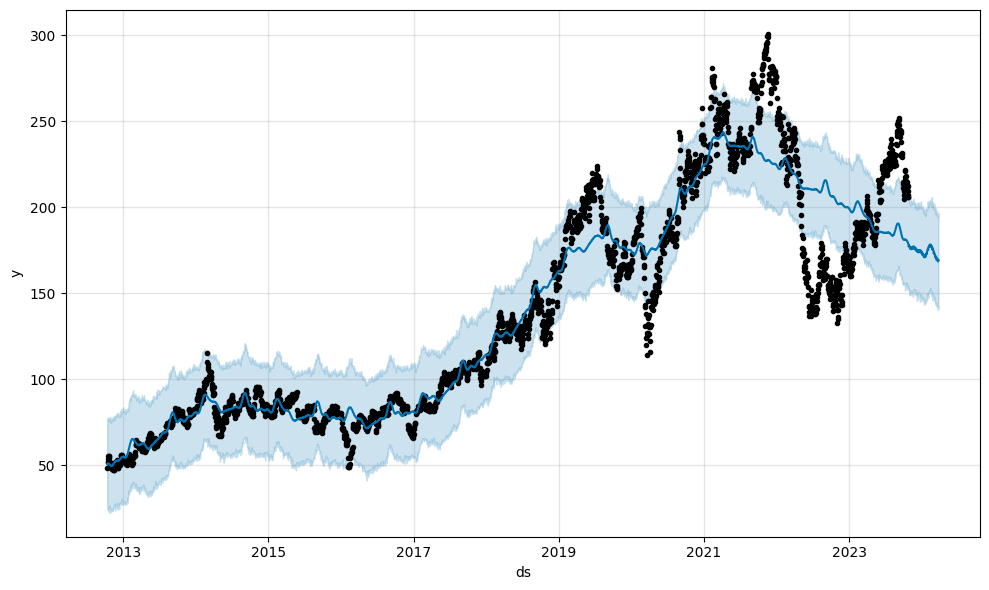

In [7]:
#from prophet.plot import plot_plotly, plot_components_plotly

#plot_plotly(m, forecast)
#use "all" tab. Variations in 1 week, 1 month etc is infinitesimally small

fig1 = m.plot(forecast)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing py

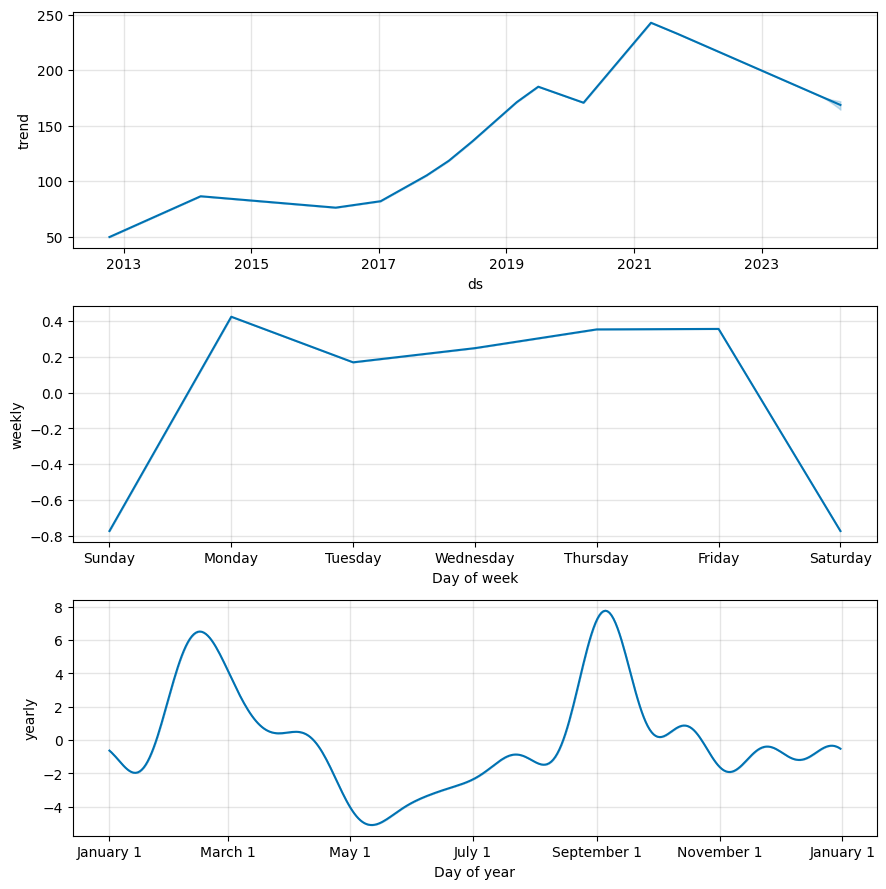

In [8]:
fig2 = m.plot_components(forecast)

#Interview Readiness Questions
1. Choose a new Ticker Symbol.  What is your ticker symbol?

     ***The Tiker Symbol I chose was WDAY for Workday ***


2. What were the future price predictions

   ** Based on FB Prophet predictions, the future prediction for Workday stocks for March 2024 are as follows:**

* **2024-03-22**
  range: $142.90 - $194.66

* **2024-03-23**
  
  range: $141.34 - $194.50

* **2024-03-24**
  range: $142.71 -$194.71

* **2024-03-25**
  
  range:  $143.93 - $198.67

* **2024-03-26**

 range: $141.86 - $198.30






3. What were the initial price predictions



> **The initial price predictions were as follows:**



* **2012-10-12**
  
  price: $48.68


* **2012-10-15**
  
  price: $51.93


* **2012-10-16**

  price: $52.16


* **2012-10-17**
  
  price: $55.41


* **2012-10-18**
  price: $53.41






# References
1, https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

2. https://colab.research.google.com/drive/1bb9LykqXq3FV8snTlWrPTHzB3amP9YFH?usp=sharing#scrollTo=iXzl-4Fz-hPV
